

<h1>Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import matplotlib

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [2]:
def sum_prod(X, V):
    result = 0
    for mat in X:
        for vec in V:
            mat = np.asarray(mat)
            vec = np.asarray(vec)
            result += np.dot(mat, vec)
    return result

print(sum_prod([ [[7,4],[1,8]], [[4,4],[3,9]] ], [ [[1], [2]], [[1], [2]] ]))

[[54]
 [76]]


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [3]:
def binarize(M, threshold=0.5):
    return [[1 if i > threshold else 0 for i in j] for j in M]

binarize([[rd.randint(-100, 100) for _ in range(5)] for _ in range(5)])

[[1, 1, 0, 1, 1],
 [0, 1, 0, 0, 1],
 [0, 0, 1, 0, 1],
 [1, 1, 0, 0, 0],
 [1, 0, 0, 1, 0]]

<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [4]:
def unique_rows(mat):
    return [list(set(_)) for _ in mat]

def unique_columns(mat):
    n, m = mat.shape
    for i in range(m):
        print(list(set(mat[:,i])))
        
mat = np.array([[rd.randint(1, 5) for _ in range(5)] for _ in range(5)])
print(mat, end = '\n \n')

for row in unique_rows(mat):
    print(np.array(row))

print()
print(unique_columns(mat))

[[5 5 3 4 4]
 [5 4 2 2 2]
 [3 2 1 4 3]
 [4 2 3 3 5]
 [1 2 1 4 2]]
 
[3 4 5]
[2 4 5]
[1 2 3 4]
[2 3 4 5]
[1 2 4]

[1, 3, 4, 5]
[2, 4, 5]
[1, 2, 3]
[2, 3, 4]
[2, 3, 4, 5]
None


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

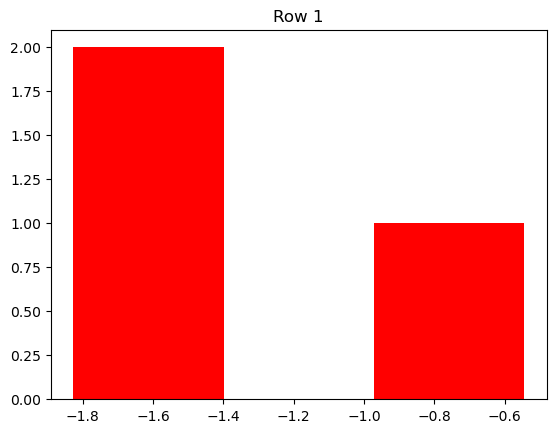

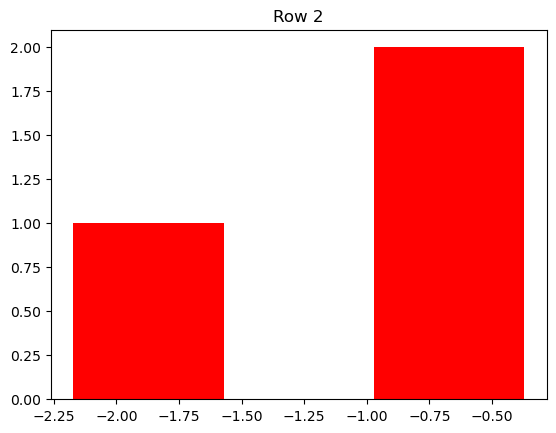

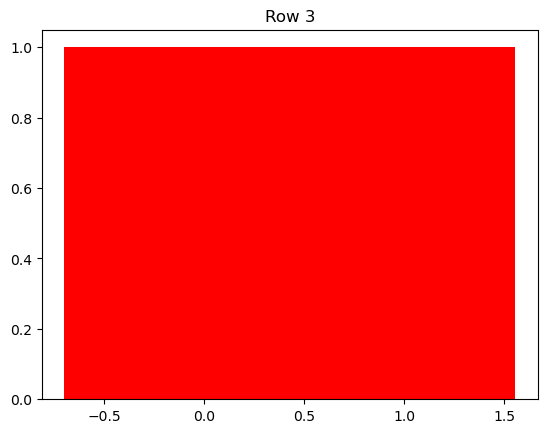

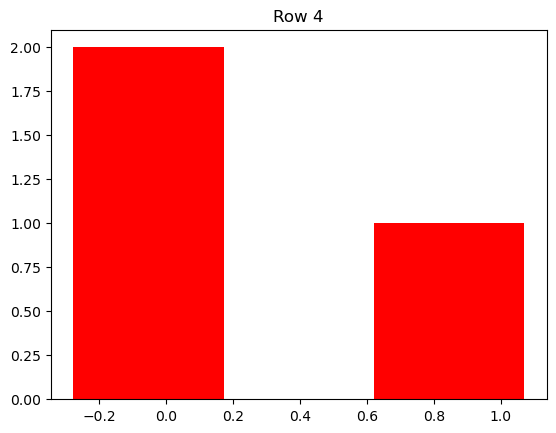

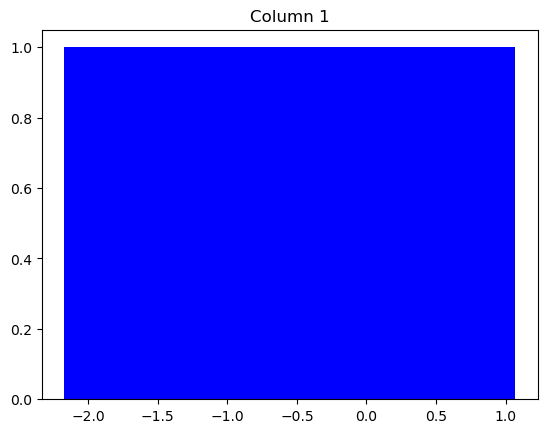

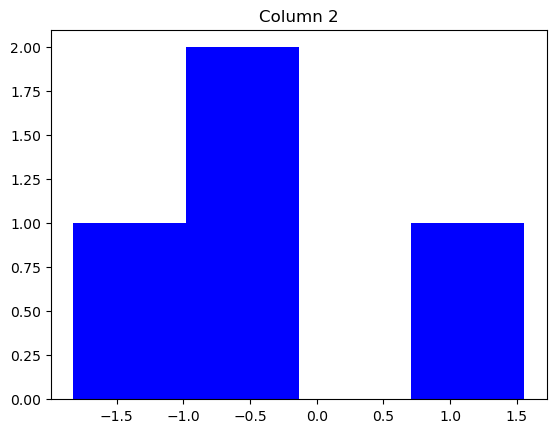

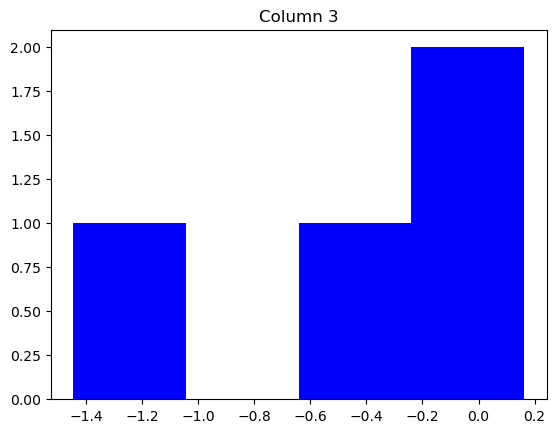

Матрица
[[-0.54 -1.83 -1.45]
 [-2.17 -0.39 -0.37]
 [-0.7   1.56  0.16]
 [ 1.07 -0.28  0.1 ]]
Математическое ожидание столбцов
[-0.59 -0.24 -0.39]
Математическое ожидание строк
[-1.27 -0.98  0.34  0.3 ]
Дисперсия столбцов
[1.32 1.44 0.42]
Дисперсия строк
[0.29 0.71 0.86 0.32]


In [5]:
def normal_matrix(m, n):
    mat = np.random.randn(m, n)

    col = np.mean(mat, axis=0)
    row = np.mean(mat, axis=1)
    var_col = np.var(mat, axis=0)
    var_row = np.var(mat, axis=1)
    
    for i in range(m):
        plt.hist(mat[i, :], bins = n, color='r')
        plt.title(f'Row {i+1}')
        plt.show()
        
    for i in range(n):
        plt.hist(mat[:, i], bins = m, color='b')
        plt.title(f'Column {i+1}')
        plt.show()

    return col, row, var_col, var_row, mat

col, row, col_vars, row_vars, matrix = normal_matrix(4, 3)

print("Матрица")
print(matrix.round(2))
print("Математическое ожидание столбцов")
print(col.round(2))
print("Математическое ожидание строк")
print(row.round(2))
print("Дисперсия столбцов")
print(col_vars.round(2))
print("Дисперсия строк")
print(row_vars.round(2))

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [6]:
def chess(m, n, a, b):
    return [[a if (i + j)%2 == 0 else b for j in range(m)] for i in range(n)]

chess(5, 5, 0, 1)

[[0, 1, 0, 1, 0],
 [1, 0, 1, 0, 1],
 [0, 1, 0, 1, 0],
 [1, 0, 1, 0, 1],
 [0, 1, 0, 1, 0]]

<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

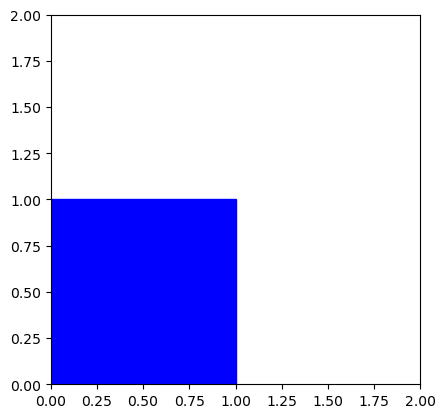

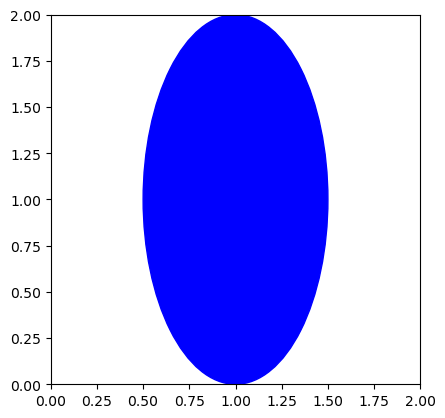

In [7]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    plt.xlim(0, m)
    plt.ylim(0, n)

    fig = plt.gca()
    fig.set_aspect("equal")
    fig.set_facecolor(background_color)

    rect = matplotlib.patches.Rectangle((0, 0), a, b, color=rectangle_color)
    fig.add_patch(rect)

    plt.show()

draw_rectangle(1, 1, 2, 2, '#0000FF', '#FFF')

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    plt.xlim(0, m)
    plt.ylim(0, n)

    fig = plt.gca()
    fig.set_aspect("equal")
    fig.set_facecolor(background_color)

    rect = matplotlib.patches.Ellipse((m/2, n/2), a, b, color=ellipse_color)
    fig.add_patch(rect)

    plt.show()

draw_ellipse(1, 2, 2, 2, '#0000FF', '#FFF')

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [10]:
def analysis(time, p):
    payoff = np.mean(time)
    variance = np.var(time)
    deviation = np.std(time)
    
    local_min = []
    local_max = []
    for i in range(1, len(time) - 1):
        if time[i] < time[i - 1] and time[i] < time[i + 1]:
            local_min.append(time[i])
        if time[i] > time[i - 1] and time[i] > time[i + 1]:
            local_max.append(time[i])

    smooth_avr = np.convolve(time, np.ones(p), mode='valid') / p

    return payoff, variance, deviation, local_min, local_max, smooth_avr

mean, variance, deviation, local_max, local_min, smooth_avr = analysis(np.array([2, 3, 4, 5, 4, 5]), 3)

print("Математичское ожидание:", mean)
print("Дисперсия:", variance)
print("Среднеквадратичное отклонение:", deviation)
print("Локальные максимумы:", local_max)
print("Локальные минимумы:", local_min)
print("Ряд скользящего среднего:", smooth_avr)

Математичское ожидание: 3.8333333333333335
Дисперсия: 1.1388888888888888
Среднеквадратичное отклонение: 1.0671873729054748
Локальные максимумы: [4]
Локальные минимумы: [5]
Ряд скользящего среднего: [3.         4.         4.33333333 4.66666667]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [9]:
def encoding(vec):
    result = np.zeros((vec.size, vec.max() + 1))
    result[np.arange(vec.size), vec] = 1
    return result

print(encoding(np.array([0, 2, 3, 0])))

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
